# Homework 2 Banking Market

## plot function

In [188]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='gray',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## load data

In [133]:
df = pd.read_csv('bank.csv')
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


## judge whether the data has null value

In [134]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## mapping string to numerical value 

In [135]:
def num_mapping(rdata):
    class_mapping = {label:idx for idx,label in enumerate(np.unique(rdata))}
    return class_mapping    

In [136]:
name_col = df.columns
m = len(name_col)-1
cnote = [1,2,3,4,6,7,8,10,15,16]
for i in cnote:
    mapping = num_mapping(df[name_col[i]])
    df[name_col[i]] = df[name_col[i]].map(mapping)
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0
4520,44,2,2,2,0,1136,1,1,0,3,0,345,2,249,7,1,0


## data standardization

In [137]:
X = df.iloc[:,:-1].values
y = df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\zhangzhech\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Logistic Regression Method

In [199]:
def logist_plot(features):
    x_train_std = X_train_std[:,features]
    x_test_std = X_test_std[:,features]
    lr = LogisticRegression(C=1000.0, random_state=0)
    lr.fit(x_train_std, y_train)
    y_pred = lr.predict(x_test_std)
    ac = accuracy_score(y_test,y_pred)
    print('Accuracy:%.3f'%ac)
    x_combined_std = np.vstack((x_train_std,x_test_std))
    y_combined = np.hstack((y_train,y_test))
    plot_decision_regions(x_combined_std, y_combined, classifier=lr, test_idx=range(3164,4520))
    plt.xlabel(name_col[features[0]])
    plt.ylabel(name_col[features[1]])
    plt.legend(loc = 'upper left')
    plt.show()

def logist(features):
    x_train_std = X_train_std[:,features]
    x_test_std = X_test_std[:,features]
    lr = LogisticRegression(C=1000.0, random_state=0)
    lr.fit(x_train_std, y_train)
    y_pred = lr.predict(x_test_std)
    ac = accuracy_score(y_test,y_pred)
    return ac

## SVM Method

In [200]:
def SVM_plot(features):
    x_train_std = X_train_std[:,features]
    x_test_std = X_test_std[:,features]
    svm = SVC(kernel='linear', C=1.0, random_state=0)
    svm.fit(x_train_std, y_train)
    y_pred = svm.predict(x_test_std)
    ac = accuracy_score(y_test,y_pred)
    print('Accuracy:%.3f'%ac)
    x_combined_std = np.vstack((x_train_std,x_test_std))
    y_combined = np.hstack((y_train,y_test))
    plot_decision_regions(x_combined_std, y_combined, classifier=svm, test_idx=range(3164,4520))
    plt.xlabel(name_col[features[0]])
    plt.ylabel(name_col[features[1]])
    plt.legend(loc = 'upper left')
    plt.show()

def SVM(features):
    x_train_std = X_train_std[:,features]
    x_test_std = X_test_std[:,features]
    svm = SVC(kernel='linear', C=1.0, random_state=0)
    svm.fit(x_train_std, y_train)
    y_pred = svm.predict(x_test_std)
    ac = accuracy_score(y_test,y_pred)
    return ac

## Decision Tree Method

In [201]:
def Dctree_plot(features):
    x_train_std = X_train_std[:,features]
    x_test_std = X_test_std[:,features]
    tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
    tree.fit(x_train_std, y_train)
    y_pred = tree.predict(x_test_std)
    ac = accuracy_score(y_test,y_pred)
    print('Accuracy:%.3f'%ac)
    x_combined_std = np.vstack((x_train_std,x_test_std))
    y_combined = np.hstack((y_train,y_test))
    plot_decision_regions(x_combined_std, y_combined, classifier=tree, test_idx=range(3164,4520))
    plt.xlabel(name_col[features[0]])
    plt.ylabel(name_col[features[1]])
    plt.legend(loc = 'upper left')
    plt.show()

def Dctree(features):
    x_train_std = X_train_std[:,features]
    x_test_std = X_test_std[:,features]
    tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
    tree.fit(x_train_std, y_train)
    y_pred = tree.predict(x_test_std)
    ac = accuracy_score(y_test,y_pred)
    return ac

## Randomly select 2 features

Accuracy:0.874


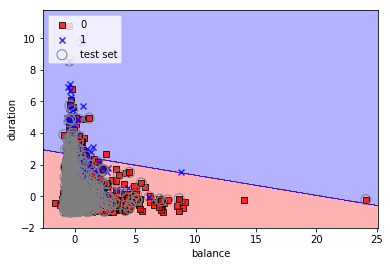

Accuracy:0.871


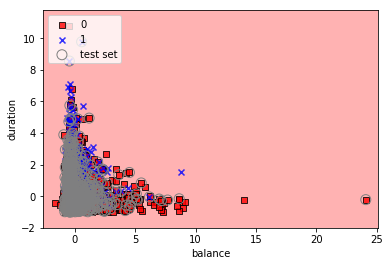

Accuracy:0.867


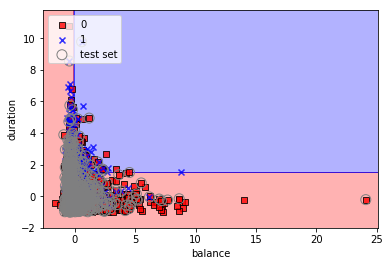

In [220]:
features = random.sample(range(m),2)
#features = [5,11]
logist_plot(features)
SVM_plot(features)
Dctree_plot(features)

## Find the best 2 features

the best features for LR method is :Index(['housing', 'duration'], dtype='object') and the accuracy is 0.879145
the best features for SVM method is :Index(['age', 'job'], dtype='object') and the accuracy is 0.871039
the best features for Tree method is :Index(['month', 'duration'], dtype='object') and the accuracy is 0.878408
Accuracy:0.879


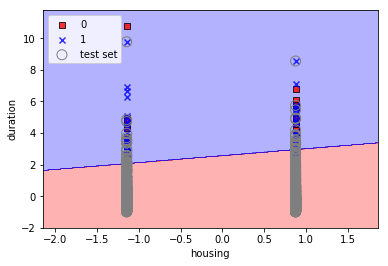

Accuracy:0.871


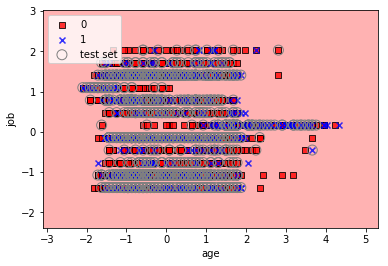

Accuracy:0.878


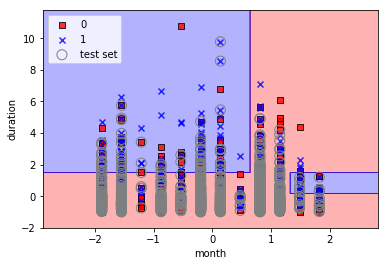

In [216]:
best_lr = 0
best_SVM = 0
best_tree = 0
for j in range(m):
    for i in range(j):
        if i!=j:
            ac1 = logist([i,j])
            ac2 = SVM([i,j])
            ac3 = Dctree([i,j])
            if ac1 > best_lr:
                lr_seq = [i,j]
                best_lr = ac1
            if ac2 > best_SVM:
                SVM_seq = [i,j]
                best_SVM = ac2
            if ac3 > best_tree:
                tree_seq = [i,j]
                best_tree =ac3

print('the best features for LR method is :%s' % name_col[lr_seq],'and the accuracy is %f' % best_lr)
print('the best features for SVM method is :%s' % name_col[SVM_seq],'and the accuracy is %f' % best_SVM)
print('the best features for Tree method is :%s' % name_col[tree_seq],'and the accuracy is %f' % best_tree)
logist_plot(lr_seq)
SVM_plot(SVM_seq)
Dctree_plot(tree_seq)